In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/kaggle/input/ccr-dataset/CCr'

In [3]:
base_dir = '/kaggle/working/data'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_colon_aca_dir = os.path.join(train_dir, 'colon_aca')
os.mkdir(train_colon_aca_dir)
train_colon_n_dir = os.path.join(train_dir, 'colon_n')
os.mkdir(train_colon_n_dir)

In [6]:
validation_colon_aca_dir = os.path.join(validation_dir, 'colon_aca')
os.mkdir(validation_colon_aca_dir)
validation_colon_n_dir = os.path.join(validation_dir, 'colon_n')
os.mkdir(validation_colon_n_dir)

In [7]:
test_colon_aca_dir = os.path.join(test_dir, 'colon_aca')
os.mkdir(test_colon_aca_dir)
test_colon_n_dir = os.path.join(test_dir, 'colon_n')
os.mkdir(test_colon_n_dir)

**Colon_aca**

In [8]:
fnames = [f'colonca{i}.jpeg' for i in range(1,2101)]  

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)  
    dst = os.path.join(train_colon_aca_dir, fname)   
    shutil.copyfile(src, dst)

In [9]:
fnames = [f'colonca{i}.jpeg' for i in range(2101, 2551)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_colon_aca_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = [f'colonca{i}.jpeg' for i in range(2551, 3001)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_colon_aca_dir, fname)
    shutil.copyfile(src, dst)

**Colon_n**

In [11]:
fnames = [f'colonn{i}.jpeg' for i in range(1,2101)]  

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)  
    dst = os.path.join(train_colon_n_dir, fname)   
    shutil.copyfile(src, dst)

In [12]:
fnames = [f'colonn{i}.jpeg' for i in range(2101, 2551)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_colon_n_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = [f'colonn{i}.jpeg' for i in range(2551, 3001)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_colon_n_dir, fname)
    shutil.copyfile(src, dst)

**Network Building**

In [14]:
from keras import layers
from keras import models

In [15]:
model = models.Sequential()
# Convolutional Base
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier Base
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,086,913 (49.92 MB)

 Trainable params: 13,086,913 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

**Data Processing and Image Generating/ Augmenting**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # (1./225) is used to turn the pixel values between 0s and 1s!
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,      
    target_size = (256, 256),
    batch_size = (20),
    class_mode='binary' 
)

Found 4200 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=(20),
    class_mode='binary'
)

Found 900 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print("Data Batch Shape: ", data_batch.shape)
    print("Labels Batch Shape: ", labels_batch.shape)
    break

Data Batch Shape:  (20, 256, 256, 3)
Labels Batch Shape:  (20,)


In [22]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - acc: 0.4967 - loss: 0.7218 - val_acc: 0.6400 - val_loss: 0.6668
Epoch 2/30
  3/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.6111 - loss: 0.6747

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.5690 - loss: 0.6683 - val_acc: 0.5978 - val_loss: 0.6453
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.6363 - loss: 0.6219 - val_acc: 0.7167 - val_loss: 0.5863
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.6838 - loss: 0.5977 - val_acc: 0.5767 - val_loss: 0.6286
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - acc: 0.7342 - loss: 0.5477 - val_acc: 0.7322 - val_loss: 0.5358
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.7899 - loss: 0.4731 - val_acc: 0.5022 - val_loss: 0.9620
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7256 - loss: 0.5455 - val_acc: 0.8200 - val_loss: 0.4347
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.7708 - loss: 0.4900 - val_acc: 0.6089 - val_loss: 0.7104
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.7737 - loss: 0.4862 - val_acc: 0.8400 - val_loss: 0.4066
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc

In [23]:
model.save('C_normal_1.h5')

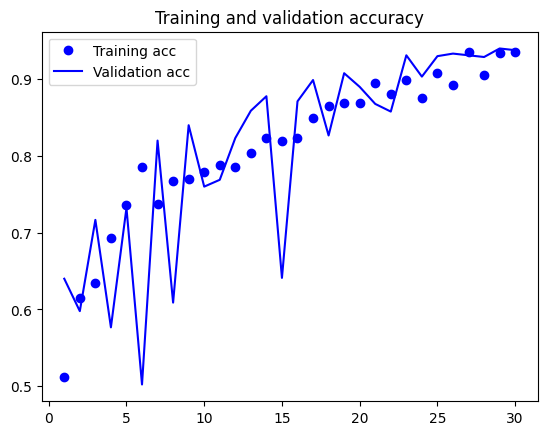

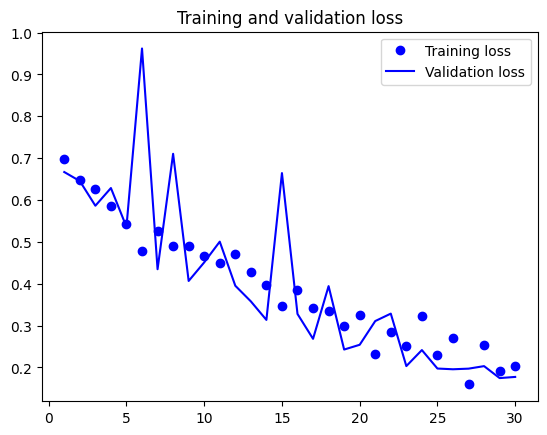

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Data Augmentation Configuration**

In [25]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

**Introducing "Dropout"!**

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))    # This is the "droupout layer"!
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,086,913 (49.92 MB)

 Trainable params: 13,086,913 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [30]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(256, 256),
                batch_size=32,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(256, 256),
                    batch_size=32,
                    class_mode='binary')

Found 4200 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [31]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 465ms/step - acc: 0.5102 - loss: 0.7045 - val_acc: 0.5444 - val_loss: 0.6862
Epoch 2/100
  2/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - acc: 0.5469 - loss: 0.6890

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - acc: 0.5365 - loss: 0.6865 - val_acc: 0.6889 - val_loss: 0.6702
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 435ms/step - acc: 0.6078 - loss: 0.6628 - val_acc: 0.5433 - val_loss: 0.6629
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.6765 - loss: 0.6056 - val_acc: 0.7600 - val_loss: 0.5452
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 439ms/step - acc: 0.6888 - loss: 0.5790 - val_acc: 0.5967 - val_loss: 0.6789
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.7054 - loss: 0.5646 - val_acc: 0.7633 - val_loss: 0.4952
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 435ms/step - acc: 0.7416 - loss: 0.5225 - val_acc: 0.7933 - val_loss: 0.4705
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - acc: 0.7541 - loss: 0.5070 - val_acc: 0.7089 - val_loss: 0.5340
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 441ms/step - acc: 0.7513 - loss: 0.5093 - val_acc: 0.8022 - val_loss: 0.4330
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━

In [32]:
model.save('C_large_1.h5.h5')

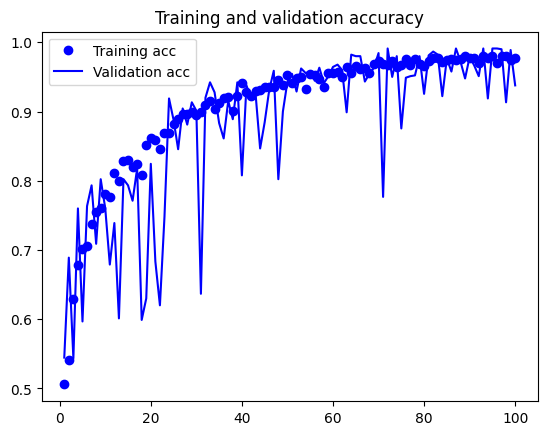

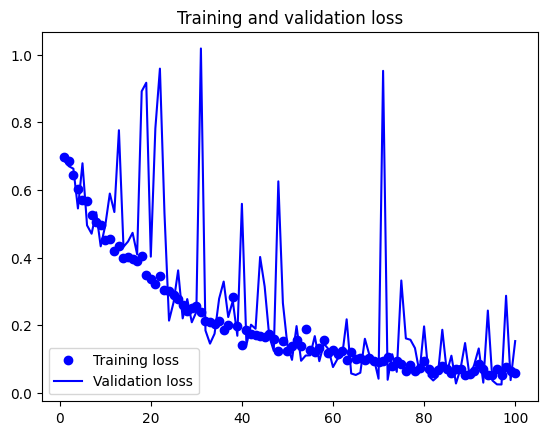

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Using a Pre-Trained Convent**

In [35]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**FAST FEATURE EXTRACTION "WITHOUT DATA AUGMENTATION"**

In [40]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 512))   
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory( 
        directory,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')
    
    
    i=0
    for inputs_batch, labels_batch in generator:    
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch 
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4200)
validation_features, validation_labels = extract_features(validation_dir, 900)
test_features, test_labels = extract_features(test_dir, 900)

Found 4200 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━

In [41]:
train_features = np.reshape(train_features, (4200, 8*8* 512))
validation_features = np.reshape(validation_features, (900, 8*8* 512))
test_features = np.reshape(test_features, (900, 8*8* 512))

In [42]:
from keras import models
from keras import layers
from keras import optimizers

In [43]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8 * 8 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
                        loss='binary_crossentropy',
                        metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8423 - loss: 0.3583 - val_acc: 0.9778 - val_loss: 0.0722
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9804 - loss: 0.0668 - val_acc: 0.9867 - val_loss: 0.0429
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9908 - loss: 0.0364 - val_acc: 0.9911 - val_loss: 0.0332
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9937 - loss: 0.0256 - val_acc: 0.9922 - val_loss: 0.0254
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9967 - loss: 0.0198 - val_acc: 0.9956 - val_loss: 0.0231
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9960 - loss: 0.0180 - val_acc: 0.9922 - val_loss: 0.0195
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9989 - loss: 0.0110 - val_acc: 0.9933 - val_loss: 0.0178
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9991 - loss: 0.0076 - val_acc: 0.9956 - val_loss: 0.0231
Epoch 9/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

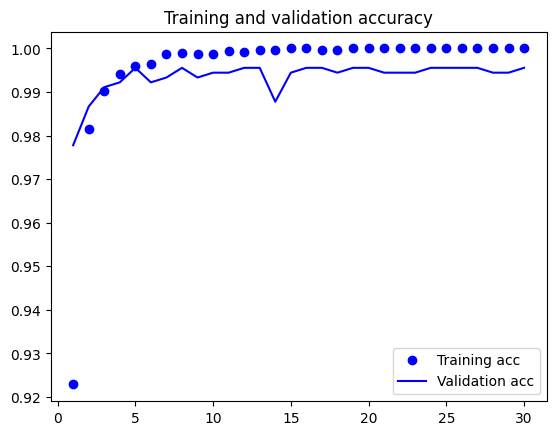

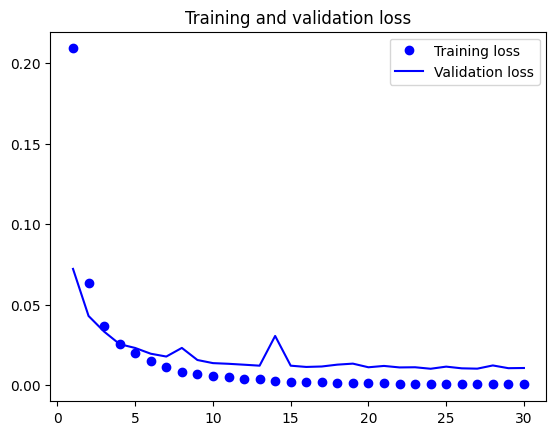

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
model.save('C_WDA_1.h5')

**FEATURE EXTRACTION WITH DATA AUGMENTATION**
 * Adding a densely connected classifier on top of the convolutional base

In [46]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 23,103,809 (88.13 MB)

 Non-trainable params: 0 (0.00 B)

**Training the model end to end with a frozen convolutional base**

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(256, 256),
                batch_size=20,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(256, 256),
                    batch_size=20,
                    class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['acc'])

Found 4200 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [53]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 537ms/step - acc: 0.8261 - loss: 0.3686 - val_acc: 0.9956 - val_loss: 0.0164
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 559ms/step - acc: 0.9822 - loss: 0.0496 - val_acc: 0.9922 - val_loss: 0.0191
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.9893 - loss: 0.0429 - val_acc: 0.9989 - val_loss: 0.0054
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 558ms/step - acc: 0.9909 - loss: 0.0347 - val_acc: 0.9989 - val_loss: 0.0051
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 557ms/step - acc: 0.9907 - loss: 0.0288 - val_acc: 0.9944 - val_loss: 0.0157
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.9714 - loss: 0.0917 - val_acc: 0.9989 - val_loss: 0.0047
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 558ms/step - acc: 0.9911 - loss: 0.0213 - val_acc: 0.9967 - val_loss: 0.0097
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 553ms/step - acc: 0.9968 - loss: 0.0108 - val_acc: 0.9989 - val_loss: 0.0019
Epoch 9/30
100/100 ━━━━━━━━━━━━━

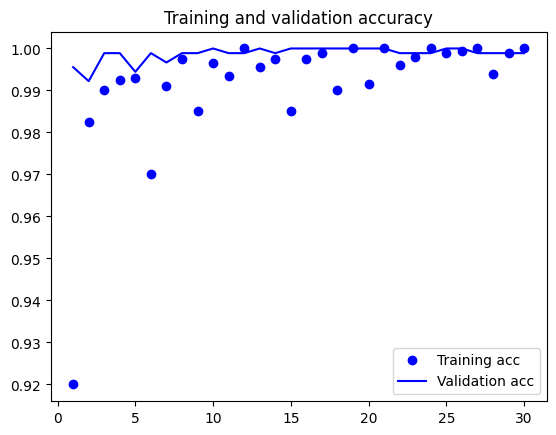

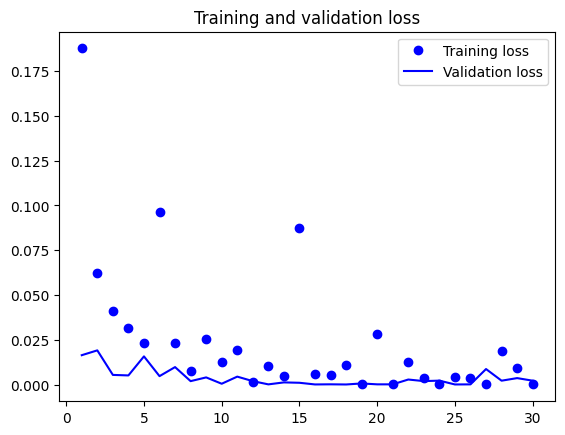

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
model.save('C_DA_1.h5')